In [0]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator,image
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
vgg_model=VGG16(include_top=False,weights="imagenet",input_shape=(224,224,3),pooling="avg")

In [0]:
for layer in vgg_model.layers[:16]:
    layer.trainable=False   

In [139]:
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers)

,0,1,2
0,<keras.engine.input_layer.InputLayer object at 0x7fb94f66fe10>,input_4,False
1,<keras.layers.convolutional.Conv2D object at 0x7fb94f66f630>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7fb94f6df518>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7fb94f6abef0>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7fb94f6c17b8>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7fb94f693588>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7fb94f658d68>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7fb94f658d30>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7fb94f603400>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7fb94f603c88>,block3_conv3,False


In [0]:
model=Sequential()
model.add(vgg_model)
model.add(Dropout(0.5))
model.add(Dense(426))
model.add(Dense(10,activation="softmax"))

In [141]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 426)               218538    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                4270      
Total params: 14,937,496
Trainable params: 4,942,424
Non-trainable params: 9,995,072
_________________________________________________________________


In [0]:
model.compile(optimizer=Adam(lr=1e-5),loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
train_dir=Path("/content/drive/My Drive/train set")
BATCH_SIZE=64
val_dir=Path("/content/drive/My Drive/val set")

In [156]:
train_datagen=ImageDataGenerator(
    rescale=1./255
)

val_datagen=ImageDataGenerator(
    rescale=1./255 
)

train_gen=train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset=None,
    shuffle=True,
    seed=22
)

val_gen=val_datagen.flow_from_directory(
    val_dir,
    target_size=(224,224),
    batch_size=10,
    class_mode="categorical",
    subset=None,
    shuffle=True,
    seed=22
)

Found 4823 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [0]:
model.load_weights("/content/2ndbest.h5")

In [168]:
hist=model.fit_generator(
    train_gen,
    steps_per_epoch=train_gen.n/BATCH_SIZE,
    epochs=1,
    validation_data=val_gen,
    validation_steps=val_gen.n/10,
    verbose=1
)

Epoch 1/1
76/75 [==============================] - 46s 599ms/step - loss: 0.4321 - acc: 0.8474 - val_loss: 1.1385 - val_acc: 0.6400


## Predictions

In [0]:
model.save_weights("2ndbest.h5")

In [0]:
test_path=Path("/content/drive/My Drive/test set")

In [0]:
test_datagen=ImageDataGenerator(
     rescale=1./255
)

In [179]:
test_generator=test_datagen.flow_from_directory(
    directory=test_path,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=1,
    class_mode=None, #return batches of images for prediction
    shuffle=False 
)


Found 100 images belonging to 10 classes.


In [180]:
model.evaluate_generator(
     generator=val_gen,
     steps=val_gen.n/1
)

[1.0662350642681122, 0.6030000045895576]

In [181]:
test_generator.reset()
pred=model.predict_generator(
    test_generator,
    steps=test_generator.n//test_generator.batch_size,
    verbose=1
    )

100/100 [==============================] - 2s 23ms/step


In [0]:
#prediction
indices=np.argmax(pred,axis=1)

label2index=test_generator.class_indices 
index2label={v:k for k,v in label2index.items()}

label_pred=[index2label[i] for i in indices]

In [0]:
#true labels
label_index=test_generator.classes
true_label=[index2label[i] for i in label_index]

In [0]:
#confusion matrix
mat=confusion_matrix(true_label,label_pred)
acc=accuracy_score(true_label,label_pred)

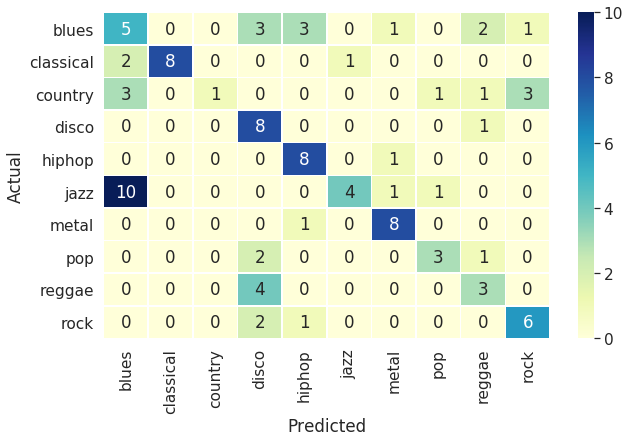

In [236]:
#plot confusion matrix
df=pd.DataFrame(mat,index=list(test_generator.class_indices),columns=list(test_generator.class_indices))
df.index.name = 'Actual'
df.columns.name = 'Predicted'
plt.figure(figsize=(10,6))
sn.set(font_scale=1.4)
sn.heatmap(df,annot=True,cmap="YlGnBu",linewidths=.5)

plt.show()